In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from google.colab import files
uploaded = files.upload()

Saving baseball.csv to baseball.csv


In [0]:
df = pd.read_csv('baseball.csv')

In [201]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,NaN,NaN,162,0.335,0.424


In [0]:
df['RD'] = df['RS'] - df['RA']

In [0]:
df2 = df[df['Year'] < 2002]

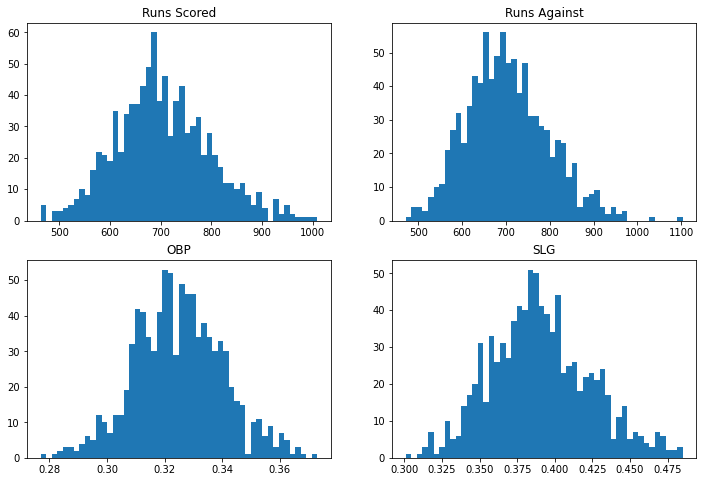

In [204]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(df2['RS'],bins=50)
plt.title('Runs Scored')
plt.subplot(2,2,2)
plt.hist(df2['RA'],bins=50)
plt.title('Runs Against')
plt.subplot(2,2,3)
plt.hist(df2['OBP'],bins=50)
plt.title('OBP')
plt.subplot(2,2,4)
plt.hist(df2['SLG'],bins=50)
plt.title('SLG')
plt.show()

In [0]:
df2['Playoff'] = np.where(df2['RankPlayoffs']>=1, 1, 0)

In [206]:
df2.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,Playoff
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,NaN,NaN,162,0.331,0.412,-39,0
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,5.0,1.0,162,0.311,0.404,141,1
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,7.0,3.0,162,0.314,0.384,86,1
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,NaN,NaN,162,0.337,0.439,-142,0
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,NaN,NaN,161,0.329,0.393,27,0


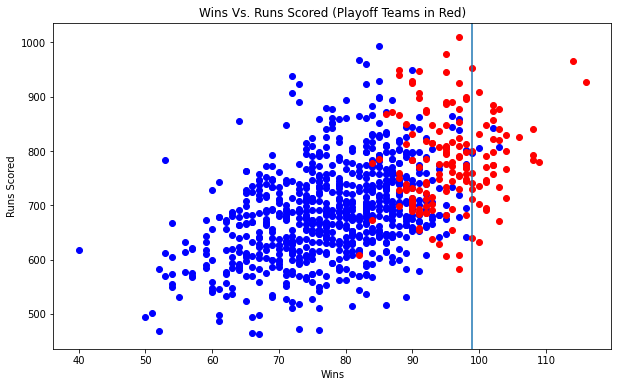

In [208]:
plt.figure(figsize=(10,6))
plt.scatter(x='W',y='RS',data=df2[df2['Playoff'] == 0], color='b')
plt.scatter(x='W',y='RS',data=df2[df2['Playoff'] == 1],color='r')
plt.title('Wins Vs. Runs Scored (Playoff Teams in Red)')
plt.xlabel('Wins')
plt.ylabel('Runs Scored')
plt.axvline(x=99)
plt.show()

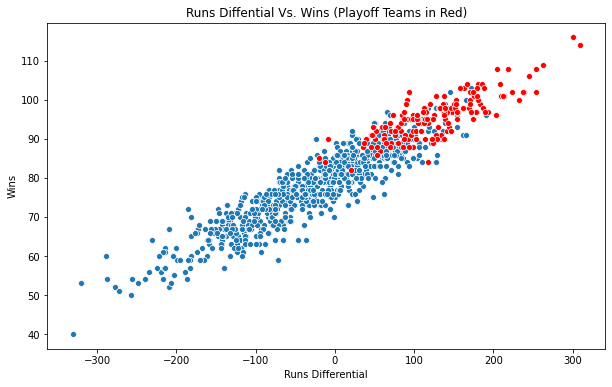

In [209]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='RD',y='W',data=df2[df2['Playoff'] == 0])
sns.scatterplot(x='RD',y='W',data=df2[df2['Playoff'] == 1],color='r')
plt.title('Runs Diffential Vs. Wins (Playoff Teams in Red)')
plt.xlabel('Runs Differential')
plt.ylabel('Wins')
plt.show()

In [210]:
df2['RD'].corr(df2['W'])

0.9385149822977124

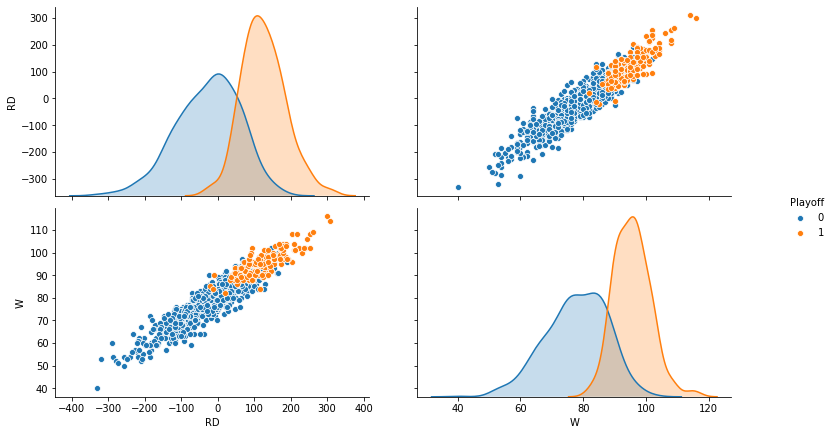

In [211]:
corrcheck = df2[['RD', 'W', 'Playoff']].copy()
g = sns.pairplot(corrcheck, hue = 'Playoff',vars=["RD", "W"])
g.fig.set_size_inches(12,6)

In [0]:
saber = df2[['OBP','SLG','BA','RS']]

In [213]:
saber.corr()

,OBP,SLG,BA,RS
OBP,1.000000,0.806154,0.854055,0.904909
SLG,0.806154,1.000000,0.814068,0.926384
BA,0.854055,0.814068,1.000000,0.831625
RS,0.904909,0.926384,0.831625,1.000000


In [214]:
df2.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            812
OSLG            812
RD                0
Playoff           0
dtype: int64

In [0]:
df2.drop(['RankSeason','RankPlayoffs'],axis=1,inplace=True)
df2.dropna(inplace=True)

In [216]:
df2.isnull().sum()

Team       0
League     0
Year       0
RS         0
RA         0
W          0
OBP        0
SLG        0
BA         0
G          0
OOBP       0
OSLG       0
RD         0
Playoff    0
dtype: int64

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [218]:
df2.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG,RD,Playoff
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,162,0.331,0.412,-39,0
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,162,0.311,0.404,141,1
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,162,0.314,0.384,86,1
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,162,0.337,0.439,-142,0
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,161,0.329,0.393,27,0


In [219]:
X = df2.iloc[:,np.r_[3:9, 10,11,13]]
y = df2.iloc[:,9]
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#Visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(3,'Score'))

  Feature      Score
1      RA  18.476360
2       W   4.448529
0      RS   3.807875


[0.10881533 0.12075867 0.12763587 0.12931182 0.11486461 0.12256575
 0.11873607 0.12623956 0.03107232]


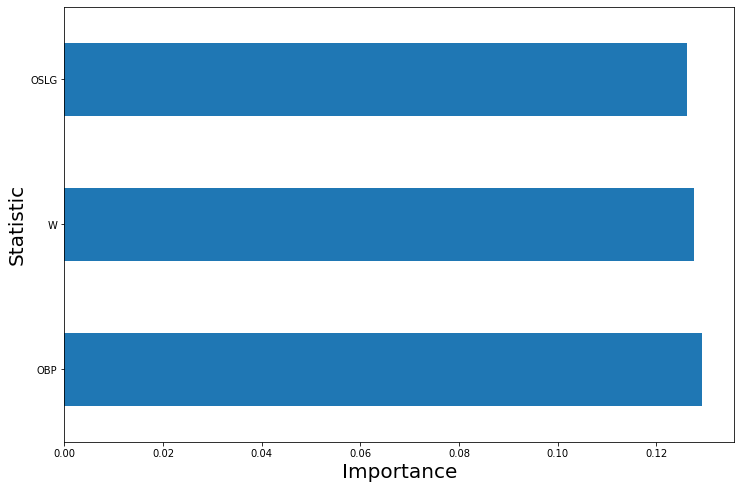

In [221]:
X = df2.iloc[:,np.r_[3:9, 10,11,13]]
y = df2.iloc[:,9]
from sklearn.ensemble import ExtraTreesClassifier
 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh', figsize = (12,8))
plt.xlabel('Importance', fontsize = 20)
plt.ylabel('Statistic', fontsize = 20)
plt.show()

In [222]:
y = df2['RS'].values
X = df2[['OBP','SLG']].values
from sklearn.linear_model import LinearRegression
rs = LinearRegression()
rs.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [223]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     513.7
Date:                Fri, 01 May 2020   Prob (F-statistic):           6.65e-49
Time:                        17:44:13   Log-Likelihood:                -408.87
No. Observations:                  90   AIC:                             823.7
Df Residuals:                      87   BIC:                             831.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1014.0183     60.763    -16.688      0.0

In [225]:
y = df2['RA'].values
X = df2[['OOBP','OSLG']].values
ra = LinearRegression()
ra.fit(X,y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     425.8
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.16e-45
Time:                        17:44:26   Log-Likelihood:                -418.27
No. Observations:                  90   AIC:                             842.5
Df Residuals:                      87   BIC:                             850.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -837.3779     60.255    -13.897      0.0

In [226]:
y = df2[['W']]
X = df2[['RD']]
w = LinearRegression()
w.fit(X,y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     891.0
Date:                Fri, 01 May 2020   Prob (F-statistic):           8.16e-48
Time:                        17:44:37   Log-Likelihood:                -240.73
No. Observations:                  90   AIC:                             485.5
Df Residuals:                      88   BIC:                             490.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9222      0.374    216.226      0.0

In [227]:
OAK = df[(df['Team'] == 'OAK') & (df['Year'] == 2001)]
OAK

,Team,League,Year,RS,RA,W,OBP,SLG,BA,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
350,OAK,AL,2001,884,645,102,0.345,0.439,0.264,2.0,4.0,162,0.308,0.38,239


In [228]:
rs.predict([[0.345,0.439]])

array([835.12581563])

The Oakland Athletics will score 835 runs

In [229]:
ra.predict([[0.308,0.380]])

array([635.43941722])

The Oakland Athletics will get 635 runs scored against

In [231]:
w.predict([[239]])

array([[104.62859993]])

The Oakland Atheltics will win 105 games

In [197]:
OAK_02 = df[(df['Team'] == 'OAK') & (df['Year'] == 2002)]
OAK_02

,Team,League,Year,RS,RA,W,OBP,SLG,BA,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
320,OAK,AL,2002,800,654,103,0.339,0.432,0.261,1.0,4.0,162,0.315,0.384,146
